# This Notebook is divided in 5 sections
1. Importing the Dataset and all the necessary libraries.
2. visualization of the data
3. Preprocessing the data
4. Training of the data
5. Conclusion.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-care-data-set-on-heart-attack-possibility/heart.csv


# 1. Importing the Dataset and libraries.

In [6]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import random
from random import shuffle

import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv('/kaggle/input/health-care-data-set-on-heart-attack-possibility/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# 2. Visualizing the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


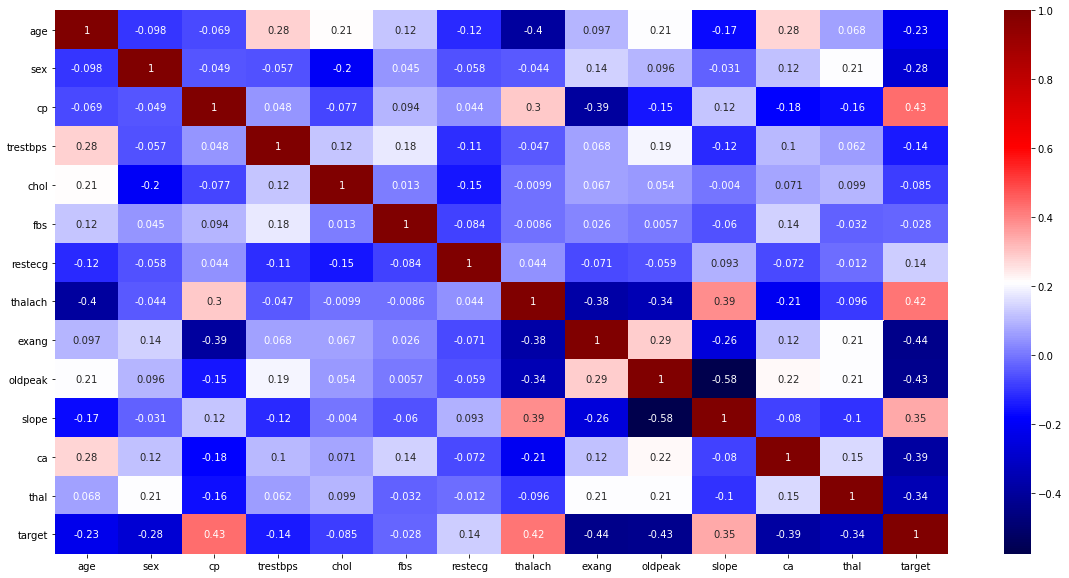

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='seismic')

In [24]:
x=np.asarray(df[["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]])
y=np.asarray(df[["target"]])


# 3. Pre-Processing the data

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [26]:
norm = StandardScaler()
x_train = norm.fit_transform(x_train)
x_test = norm.fit_transform(x_test)

# 4. Training of the dataset

1. ***Logistic Regression***

In [27]:
lr = LogisticRegression()
history_2 = lr.fit(x_train,y_train) 


y_pred_2 = lr.predict(x_test)
y_pred_2 = (y_pred_2 > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_2)
print(cm)
print(accuracy_score(y_test, y_pred_2))


pred_2 = 100*accuracy_score(y_test,y_pred_2)

print('percentage Accuracy : ',pred_2)

[[21  6]
 [ 3 31]]
0.8524590163934426
percentage Accuracy :  85.24590163934425


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


2. ***Random Forest***

In [28]:
rnf = RandomForestClassifier(n_estimators=100,random_state=0,max_depth=5)
history_3 = rnf.fit(x_train,y_train)


y_pred_3 = rnf.predict(x_test)
y_pred_3 = (y_pred_3 > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_3)
print(cm)
print(accuracy_score(y_test, y_pred_3))

pred_3 = 100*accuracy_score(y_test,y_pred_3)

print('percentage Accuracy : ',pred_3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[[22  5]
 [ 5 29]]
0.8360655737704918
percentage Accuracy :  83.60655737704919


3. ***Decision Tree***

In [29]:
dt = DecisionTreeClassifier()
history_4 = dt.fit(x_train, y_train)


y_pred_4 = dt.predict(x_test)
y_pred_4 = (y_pred_4 > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_4)
print(cm)
print(accuracy_score(y_test, y_pred_4))

pred_4 = 100*accuracy_score(y_test,y_pred_4)

print('percentage Accuracy : ',pred_4)

[[22  5]
 [ 9 25]]
0.7704918032786885
percentage Accuracy :  77.04918032786885


# 5. Conclusion

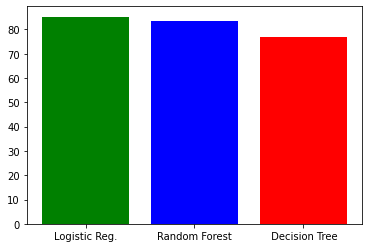

In [31]:
height = [pred_2,pred_3,pred_4]
bars = ('Logistic Reg.','Random Forest',' Decision Tree')
y_pos = np.arange(len(bars))

plt.bar(y_pos, height, color=['green', 'blue','red'])
plt.xticks(y_pos, bars)
plt.show()

In [ ]:
print(max(height))

Thus, we can conclude that Random Forest has work best in this case with accuracy being ***86.84%***

Hope you enjoyed the Notebook!!!

***Thank you***